# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file= "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
#url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}"
url = "https://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city.replace(' ','+') 
    print(city_url)
    response = requests.get(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()
        #time.sleep(1)
        print(city_weather)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        #time.sleep(1)
        pass
    
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=belushya+guba
Processing Record 1 of Set 1 | belushya guba
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=bluff
Processing Record 2 of Set 1 | bluff
{'coord': {'lon': 168.3333, 'lat': -46.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 50.81, 'feels_like': 48.36, 'temp_min': 50.81, 'temp_max': 50.81, 'pressure': 1014, 'humidity': 59, 'sea_level': 1014, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 13.2, 'deg': 161, 'gust': 11.83}, 'clouds': {'all': 10}, 'dt': 1670296509, 'sys': {'type': 2, 'id': 2008959, 'country': 'NZ', 'sunrise': 1670258896, 'sunset': 1670315218}, 'timezone': 46800, 'id': 2206939, 'name':

Processing Record 14 of Set 1 | lebu
{'coord': {'lon': -73.65, 'lat': -37.6167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.25, 'feels_like': 56.91, 'temp_min': 57.25, 'temp_max': 57.25, 'pressure': 1018, 'humidity': 90, 'sea_level': 1018, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 2.86, 'deg': 141, 'gust': 3.44}, 'clouds': {'all': 8}, 'dt': 1670296281, 'sys': {'country': 'CL', 'sunrise': 1670318792, 'sunset': 1670371507}, 'timezone': -10800, 'id': 3883457, 'name': 'Lebu', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=villa+elisa
Processing Record 15 of Set 1 | villa elisa
{'coord': {'lon': -57.6167, 'lat': -25.3667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 81.99, 'feels_like': 86.2, 'temp_min': 81.99, 'temp_max': 81.99, 'pressure': 1009

Processing Record 27 of Set 1 | kununurra
{'coord': {'lon': 128.7333, 'lat': -15.7667}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 98.58, 'feels_like': 111.18, 'temp_min': 98.58, 'temp_max': 98.58, 'pressure': 1007, 'humidity': 47}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 60}, 'clouds': {'all': 21}, 'dt': 1670296536, 'sys': {'type': 1, 'id': 9587, 'country': 'AU', 'sunrise': 1670273131, 'sunset': 1670319996}, 'timezone': 28800, 'id': 2068110, 'name': 'Kununurra', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=cape+town
Processing Record 28 of Set 1 | cape town
{'coord': {'lon': 18.4232, 'lat': -33.9258}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 61.36, 'feels_like': 60.58, 'temp_min': 52.11, 'temp_max': 66.38, 'pressure': 1015, 'humidity'

Processing Record 40 of Set 1 | petropavlovsk-kamchatskiy
{'coord': {'lon': 158.6483, 'lat': 53.0452}, 'weather': [{'id': 620, 'main': 'Snow', 'description': 'light shower snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 19.99, 'feels_like': 9.54, 'temp_min': 19.78, 'temp_max': 19.99, 'pressure': 1004, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 8.95, 'deg': 140}, 'clouds': {'all': 75}, 'dt': 1670296542, 'sys': {'type': 1, 'id': 8887, 'country': 'RU', 'sunrise': 1670275343, 'sunset': 1670303420}, 'timezone': 43200, 'id': 2122104, 'name': 'Petropavlovsk-Kamchatskiy', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=cidreira
Processing Record 41 of Set 1 | cidreira
{'coord': {'lon': -50.2056, 'lat': -30.1811}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 70.99, 'feels_like': 72.1, 'temp_min': 70.99, 'temp_max': 70.

Processing Record 3 of Set 2 | hofn
{'coord': {'lon': -15.2082, 'lat': 64.2539}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 34.43, 'feels_like': 27.91, 'temp_min': 34.43, 'temp_max': 34.43, 'pressure': 1045, 'humidity': 68, 'sea_level': 1045, 'grnd_level': 1045}, 'visibility': 10000, 'wind': {'speed': 7.81, 'deg': 24, 'gust': 5.7}, 'clouds': {'all': 77}, 'dt': 1670296548, 'sys': {'country': 'IS', 'sunrise': 1670322795, 'sunset': 1670339444}, 'timezone': 0, 'id': 2630299, 'name': 'Hofn', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=touros
Processing Record 4 of Set 2 | touros
{'coord': {'lon': -35.4608, 'lat': -5.1989}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.04, 'feels_like': 79.03, 'temp_min': 78.04, 'temp_max': 78.04, 'pressure': 1013, 'humidity'

Processing Record 16 of Set 2 | coihaique
{'coord': {'lon': -72.0662, 'lat': -45.5752}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 49.95, 'feels_like': 47.16, 'temp_min': 47.01, 'temp_max': 49.95, 'pressure': 1008, 'humidity': 57}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 0, 'gust': 24.16}, 'clouds': {'all': 0}, 'dt': 1670296553, 'sys': {'type': 1, 'id': 8491, 'country': 'CL', 'sunrise': 1670316825, 'sunset': 1670372714}, 'timezone': -10800, 'id': 3894426, 'name': 'Coyhaique', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=udachnyy
Processing Record 17 of Set 2 | udachnyy
{'coord': {'lon': 112.4, 'lat': 66.4167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -28.19, 'feels_like': -40.79, 'temp_min': -28.19, 'temp_max': -28.19, 'pressure': 1005, '

Processing Record 29 of Set 2 | port blair
{'coord': {'lon': 92.75, 'lat': 11.6667}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 80.64, 'feels_like': 86.14, 'temp_min': 80.64, 'temp_max': 80.64, 'pressure': 1010, 'humidity': 83}, 'visibility': 6000, 'wind': {'speed': 10.36, 'deg': 140}, 'rain': {'1h': 1.33}, 'clouds': {'all': 75}, 'dt': 1670296558, 'sys': {'type': 1, 'id': 9215, 'country': 'IN', 'sunrise': 1670284556, 'sunset': 1670325848}, 'timezone': 19800, 'id': 1259385, 'name': 'Port Blair', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=charlestown
Processing Record 30 of Set 2 | charlestown
{'coord': {'lon': 151.6667, 'lat': -32.95}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 71.82, 'feels_like': 72.09, 'temp_min': 69.51, 'temp_max': 73.18, 'pressu

Processing Record 43 of Set 2 | grand gaube
{'coord': {'lon': 57.6608, 'lat': -20.0064}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 77.38, 'feels_like': 78.39, 'temp_min': 77.38, 'temp_max': 77.4, 'pressure': 1016, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 5.01, 'deg': 133, 'gust': 8.01}, 'clouds': {'all': 68}, 'dt': 1670296570, 'sys': {'type': 2, 'id': 2002134, 'country': 'MU', 'sunrise': 1670289715, 'sunset': 1670337536}, 'timezone': 14400, 'id': 934479, 'name': 'Grand Gaube', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=sola
Processing Record 44 of Set 2 | sola
{'coord': {'lon': 167.55, 'lat': -13.8833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 88.47, 'feels_like': 101.07, 'temp_min': 88.47, 'temp_max': 88.47, 'pressure': 1007, 'h

Processing Record 5 of Set 3 | portland
{'coord': {'lon': -122.6762, 'lat': 45.5234}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 36.52, 'feels_like': 30.99, 'temp_min': 32.86, 'temp_max': 39.81, 'pressure': 1017, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 130}, 'clouds': {'all': 100}, 'dt': 1670296302, 'sys': {'type': 2, 'id': 2008548, 'country': 'US', 'sunrise': 1670254515, 'sunset': 1670286474}, 'timezone': -28800, 'id': 5746545, 'name': 'Portland', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=la+asuncion
Processing Record 6 of Set 3 | la asuncion
{'coord': {'lon': -63.8628, 'lat': 11.0333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.59, 'feels_like': 75.56, 'temp_min': 74.59, 'temp_max': 74.59, 'pressure': 1012, 'hu

Processing Record 17 of Set 3 | umzimvubu
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=nishihara
Processing Record 18 of Set 3 | nishihara
{'coord': {'lon': 127.7558, 'lat': 26.1842}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 72.1, 'feels_like': 72.01, 'temp_min': 68.68, 'temp_max': 72.68, 'pressure': 1018, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 21.85, 'deg': 20}, 'clouds': {'all': 75}, 'dt': 1670296600, 'sys': {'type': 1, 'id': 8156, 'country': 'JP', 'sunrise': 1670277765, 'sunset': 1670315831}, 'timezone': 32400, 'id': 1855342, 'name': 'Nishihara', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=chissamba
Processing Record 19 of Set 3 | chissamba
{'coord': {'lon': 17.3333, 'lat': -12.166

Processing Record 30 of Set 3 | tacarigua
{'coord': {'lon': -67.9198, 'lat': 10.0862}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 63.99, 'feels_like': 64.54, 'temp_min': 63.99, 'temp_max': 63.99, 'pressure': 1013, 'humidity': 95, 'sea_level': 1013, 'grnd_level': 964}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 5, 'gust': 6.69}, 'clouds': {'all': 35}, 'dt': 1670296605, 'sys': {'country': 'VE', 'sunrise': 1670236538, 'sunset': 1670278160}, 'timezone': -14400, 'id': 3646062, 'name': 'Tacarigua', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=storsteinnes
Processing Record 31 of Set 3 | storsteinnes
{'coord': {'lon': 19.2344, 'lat': 69.2408}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 34.45, 'feels_like': 26.56, 'temp_min': 32.38, 'temp_max': 34.45, '

Processing Record 42 of Set 3 | tadine
{'coord': {'lon': 167.8833, 'lat': -21.55}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.92, 'feels_like': 89.33, 'temp_min': 82.92, 'temp_max': 82.92, 'pressure': 1008, 'humidity': 74, 'sea_level': 1008, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 10.56, 'deg': 293, 'gust': 13.87}, 'clouds': {'all': 93}, 'dt': 1670296610, 'sys': {'country': 'NC', 'sunrise': 1670263078, 'sunset': 1670311251}, 'timezone': 39600, 'id': 2138285, 'name': 'Tadine', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=kachug
Processing Record 43 of Set 3 | kachug
{'coord': {'lon': 105.8817, 'lat': 53.9606}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 12.33, 'feels_like': -0.27, 'temp_min': 12.33, 'temp_max': 12.33, 'press

Processing Record 5 of Set 4 | bambous virieux
{'coord': {'lon': 57.7575, 'lat': -20.3428}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 77.25, 'feels_like': 78.35, 'temp_min': 77.22, 'temp_max': 77.25, 'pressure': 1016, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 100}, 'clouds': {'all': 75}, 'dt': 1670296615, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1670289653, 'sunset': 1670337552}, 'timezone': 14400, 'id': 1106677, 'name': 'Bambous Virieux', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=ambilobe
Processing Record 6 of Set 4 | ambilobe
{'coord': {'lon': 49.05, 'lat': -13.2}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 75.22, 'feels_like': 76.3, 'temp_min': 75.22, 'temp_max': 75.22, 'pressure': 1014, 'humidity': 82

Processing Record 18 of Set 4 | bjornevatn
{'coord': {'lon': 29.9847, 'lat': 69.6672}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 25.14, 'feels_like': 18.28, 'temp_min': 24.42, 'temp_max': 25.14, 'pressure': 998, 'humidity': 93}, 'visibility': 2400, 'wind': {'speed': 5.75, 'deg': 180}, 'snow': {'1h': 0.22}, 'clouds': {'all': 100}, 'dt': 1670296620, 'sys': {'type': 1, 'id': 1639, 'country': 'NO', 'sunrise': 0, 'sunset': 0}, 'timezone': 3600, 'id': 780643, 'name': 'Bjørnevatn', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=kushmurun
Processing Record 19 of Set 4 | kushmurun
{'coord': {'lon': 64.6311, 'lat': 52.4503}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -7.51, 'feels_like': -19.17, 'temp_min': -7.51, 'temp_max': -7.51, 'pressure': 1042, 'humidity': 88, '

Processing Record 30 of Set 4 | southbridge
{'coord': {'lon': -72.0334, 'lat': 42.0751}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 33.28, 'feels_like': 30.76, 'temp_min': 28.67, 'temp_max': 38.05, 'pressure': 1027, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 97, 'gust': 5.01}, 'clouds': {'all': 100}, 'dt': 1670296633, 'sys': {'type': 2, 'id': 2043130, 'country': 'US', 'sunrise': 1670241664, 'sunset': 1670275009}, 'timezone': -18000, 'id': 4951594, 'name': 'Southbridge', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=tasiilaq
Processing Record 31 of Set 4 | tasiilaq
{'coord': {'lon': -37.6368, 'lat': 65.6145}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 24.96, 'feels_like': 20.17, 'temp_min': 24.96, 'temp_max': 24.96, 'pressure': 104

Processing Record 42 of Set 4 | kutum
{'coord': {'lon': 24.6667, 'lat': 14.2}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 56.52, 'feels_like': 53.37, 'temp_min': 56.52, 'temp_max': 56.52, 'pressure': 1017, 'humidity': 32, 'sea_level': 1017, 'grnd_level': 888}, 'visibility': 10000, 'wind': {'speed': 12.44, 'deg': 34, 'gust': 25.21}, 'clouds': {'all': 0}, 'dt': 1670296645, 'sys': {'country': 'SD', 'sunrise': 1670301165, 'sunset': 1670341928}, 'timezone': 7200, 'id': 371745, 'name': 'Kutum', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=ribeira+grande
Processing Record 43 of Set 4 | ribeira grande
{'coord': {'lon': -28.7, 'lat': 38.5167}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 60.78, 'feels_like': 60.66, 'temp_min': 60.78, 'temp_max': 60.78, 'pressure': 10

Processing Record 6 of Set 5 | vilyuysk
{'coord': {'lon': 121.6247, 'lat': 63.7553}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -11.24, 'feels_like': -23.84, 'temp_min': -11.24, 'temp_max': -11.24, 'pressure': 997, 'humidity': 95, 'sea_level': 997, 'grnd_level': 982}, 'visibility': 1488, 'wind': {'speed': 6.8, 'deg': 333, 'gust': 14.23}, 'clouds': {'all': 100}, 'dt': 1670296657, 'sys': {'country': 'RU', 'sunrise': 1670289474, 'sunset': 1670307066}, 'timezone': 32400, 'id': 2013392, 'name': 'Vilyuysk', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=chuy
Processing Record 7 of Set 5 | chuy
{'coord': {'lon': -53.4616, 'lat': -33.6971}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 63.07, 'feels_like': 63.5, 'temp_min': 63.07, 'temp_max': 63.07, 'pressure': 101

Processing Record 19 of Set 5 | marystown
{'coord': {'lon': -55.1483, 'lat': 47.1666}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 35.37, 'feels_like': 28.87, 'temp_min': 35.37, 'temp_max': 35.37, 'pressure': 1035, 'humidity': 89, 'sea_level': 1035, 'grnd_level': 1033}, 'visibility': 10000, 'wind': {'speed': 8.14, 'deg': 27, 'gust': 12.8}, 'clouds': {'all': 35}, 'dt': 1670296662, 'sys': {'country': 'CA', 'sunrise': 1670238660, 'sunset': 1670269907}, 'timezone': -12600, 'id': 6067472, 'name': 'Marystown', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=torbay
Processing Record 20 of Set 5 | torbay
{'coord': {'lon': -52.7314, 'lat': 47.6666}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09n'}, {'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}, {'id': 500, 'main': 'Rain', 'd

Processing Record 31 of Set 5 | baykit
{'coord': {'lon': 96.37, 'lat': 61.67}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 3.09, 'feels_like': -8.32, 'temp_min': 3.09, 'temp_max': 3.09, 'pressure': 1020, 'humidity': 96, 'sea_level': 1020, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 6.11, 'deg': 286, 'gust': 17.85}, 'clouds': {'all': 90}, 'dt': 1670296667, 'sys': {'country': 'RU', 'sunrise': 1670294054, 'sunset': 1670314612}, 'timezone': 25200, 'id': 1510689, 'name': 'Baykit', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=samarai
Processing Record 32 of Set 5 | samarai
{'coord': {'lon': 150.6667, 'lat': -10.6167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 83.97, 'feels_like': 89.46, 'temp_min': 83.97, 'temp_max': 83.97, 'pressure':

Processing Record 43 of Set 5 | the valley
{'coord': {'lon': -63.0578, 'lat': 18.217}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 78.67, 'feels_like': 79.48, 'temp_min': 78.66, 'temp_max': 79.11, 'pressure': 1011, 'humidity': 69, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 16.26, 'deg': 357, 'gust': 17.05}, 'clouds': {'all': 11}, 'dt': 1670296672, 'sys': {'type': 1, 'id': 8801, 'country': 'AI', 'sunrise': 1670236223, 'sunset': 1670276141}, 'timezone': -14400, 'id': 3573374, 'name': 'The Valley', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=aripuana
Processing Record 44 of Set 5 | aripuana
{'coord': {'lon': -60.6333, 'lat': -9.1667}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 71.26, 'feels_like': 72.73, 'temp_min'

Processing Record 6 of Set 6 | marcona
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=taksimo
Processing Record 7 of Set 6 | taksimo
{'coord': {'lon': 114.8794, 'lat': 56.3444}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 7.77, 'feels_like': 0.41, 'temp_min': 7.77, 'temp_max': 7.77, 'pressure': 1008, 'humidity': 93, 'sea_level': 1008, 'grnd_level': 942}, 'visibility': 436, 'wind': {'speed': 3.8, 'deg': 249, 'gust': 6.89}, 'snow': {'1h': 0.13}, 'clouds': {'all': 100}, 'dt': 1670296678, 'sys': {'country': 'RU', 'sunrise': 1670287004, 'sunset': 1670312775}, 'timezone': 28800, 'id': 2015701, 'name': 'Taksimo', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=safford
Processing Record 8 of Set 6 | safford
{'coord': {'lon

Processing Record 19 of Set 6 | qaqortoq
{'coord': {'lon': -46.0333, 'lat': 60.7167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 32, 'feels_like': 23.2, 'temp_min': 32, 'temp_max': 32, 'pressure': 1041, 'humidity': 73, 'sea_level': 1041, 'grnd_level': 1041}, 'visibility': 10000, 'wind': {'speed': 11.1, 'deg': 54, 'gust': 20.62}, 'clouds': {'all': 100}, 'dt': 1670296655, 'sys': {'country': 'GL', 'sunrise': 1670327708, 'sunset': 1670349331}, 'timezone': -10800, 'id': 3420846, 'name': 'Qaqortoq', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=saint-philippe
Processing Record 20 of Set 6 | saint-philippe
{'coord': {'lon': 55.7679, 'lat': -21.3585}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 78.39, 'feels_like': 79.88, 'temp_min': 75.11, 'temp_max': 78.39, 'p

Processing Record 32 of Set 6 | rio grande
{'coord': {'lon': -52.0986, 'lat': -32.035}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 67.1, 'feels_like': 67.75, 'temp_min': 67.1, 'temp_max': 67.1, 'pressure': 1015, 'humidity': 90, 'sea_level': 1015, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 8.48, 'deg': 94, 'gust': 12.03}, 'clouds': {'all': 0}, 'dt': 1670296709, 'sys': {'country': 'BR', 'sunrise': 1670314506, 'sunset': 1670365445}, 'timezone': -10800, 'id': 3451138, 'name': 'Rio Grande', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=erzin
Processing Record 33 of Set 6 | erzin
{'coord': {'lon': 36.2, 'lat': 36.9559}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 54.52, 'feels_like': 52.59, 'temp_min': 54.52, 'temp_max': 54.52, 'pressure': 1018,

Processing Record 44 of Set 6 | santa isabel do rio negro
{'coord': {'lon': -65.0192, 'lat': -0.4139}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.1, 'feels_like': 77.65, 'temp_min': 76.1, 'temp_max': 76.1, 'pressure': 1009, 'humidity': 90, 'sea_level': 1009, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 56, 'gust': 4.76}, 'clouds': {'all': 100}, 'dt': 1670296717, 'sys': {'country': 'BR', 'sunrise': 1670234796, 'sunset': 1670278509}, 'timezone': -14400, 'id': 3662489, 'name': 'Santa Isabel Rio Negro', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=linares
Processing Record 45 of Set 6 | linares
{'coord': {'lon': -71.6, 'lat': -35.85}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 56.8, 'feels_like': 54.72, 'temp_min': 56.8, 'temp

Processing Record 7 of Set 7 | amapa
{'coord': {'lon': -52, 'lat': 1}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 70.86, 'feels_like': 72.25, 'temp_min': 70.86, 'temp_max': 70.86, 'pressure': 1011, 'humidity': 98, 'sea_level': 1011, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 0.54, 'deg': 357, 'gust': 0.45}, 'clouds': {'all': 97}, 'dt': 1670296723, 'sys': {'country': 'BR', 'sunrise': 1670318236, 'sunset': 1670361668}, 'timezone': -10800, 'id': 3407762, 'name': 'Amapá', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=ancud
Processing Record 8 of Set 7 | ancud
{'coord': {'lon': -73.8203, 'lat': -41.8697}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.53, 'feels_like': 53.1, 'temp_min': 53.53, 'temp_max': 53.53, 'pressure': 1016, 'humidit

Processing Record 19 of Set 7 | port-cartier
{'coord': {'lon': -66.8654, 'lat': 50.0334}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 35.29, 'feels_like': 28.24, 'temp_min': 35.28, 'temp_max': 35.82, 'pressure': 1025, 'humidity': 85, 'sea_level': 1025, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 9.13, 'deg': 202, 'gust': 18.16}, 'clouds': {'all': 100}, 'dt': 1670296728, 'sys': {'type': 1, 'id': 309, 'country': 'CA', 'sunrise': 1670242177, 'sunset': 1670272015}, 'timezone': -18000, 'id': 6111696, 'name': 'Port-Cartier', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=makat
Processing Record 20 of Set 7 | makat
{'coord': {'lon': 53.3463, 'lat': 47.6469}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 15.8, 'feels_like': 5, 'temp_min': 15.8, 'te

Processing Record 31 of Set 7 | rio gallegos
{'coord': {'lon': -69.2181, 'lat': -51.6226}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 44.65, 'feels_like': 38.86, 'temp_min': 44.65, 'temp_max': 44.65, 'pressure': 997, 'humidity': 49}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 200}, 'clouds': {'all': 20}, 'dt': 1670296733, 'sys': {'type': 1, 'id': 8293, 'country': 'AR', 'sunrise': 1670314503, 'sunset': 1670373668}, 'timezone': -10800, 'id': 3838859, 'name': 'Río Gallegos', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=urdzhar
Processing Record 32 of Set 7 | urdzhar
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=quatre+cocos
Processing Record 33 of Set 7 | quatre cocos
{'coord': {'lon': 57.7625, 'lat': 

Processing Record 44 of Set 7 | sokolo
{'coord': {'lon': -6.1219, 'lat': 14.7328}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 82.62, 'feels_like': 80.38, 'temp_min': 82.62, 'temp_max': 82.62, 'pressure': 1011, 'humidity': 22, 'sea_level': 1011, 'grnd_level': 980}, 'visibility': 10000, 'wind': {'speed': 11.12, 'deg': 36, 'gust': 24.61}, 'clouds': {'all': 96}, 'dt': 1670296739, 'sys': {'country': 'ML', 'sunrise': 1670308614, 'sunset': 1670349263}, 'timezone': 0, 'id': 2450849, 'name': 'Sokolo', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=kapit
Processing Record 45 of Set 7 | kapit
{'coord': {'lon': 112.9333, 'lat': 2.0167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 88.48, 'feels_like': 96.21, 'temp_min': 88.48, 'temp_max': 88.48, 'pressure': 100

Processing Record 8 of Set 8 | alpine
{'coord': {'lon': -116.7664, 'lat': 32.835}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 47.95, 'feels_like': 47.95, 'temp_min': 44.42, 'temp_max': 51.73, 'pressure': 1019, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 75}, 'dt': 1670296568, 'sys': {'type': 2, 'id': 2008278, 'country': 'US', 'sunrise': 1670250912, 'sunset': 1670287239}, 'timezone': -28800, 'id': 5323401, 'name': 'Alpine', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=jacareacanga
Processing Record 9 of Set 8 | jacareacanga
{'coord': {'lon': -57.7528, 'lat': -6.2222}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.45, 'feels_like': 75.11, 'temp_min': 73.45, 'temp_max': 73.45, 'pressure': 1010, 'humidity': 98

Processing Record 20 of Set 8 | teacapan
{'coord': {'lon': -105.75, 'lat': 22.55}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72.72, 'feels_like': 73.78, 'temp_min': 72.72, 'temp_max': 72.72, 'pressure': 1011, 'humidity': 87, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 30, 'gust': 1.57}, 'clouds': {'all': 85}, 'dt': 1670296762, 'sys': {'country': 'MX', 'sunrise': 1670246959, 'sunset': 1670285903}, 'timezone': -25200, 'id': 3982287, 'name': 'Teacapan', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=tahoua
Processing Record 21 of Set 8 | tahoua
{'coord': {'lon': 5.2692, 'lat': 14.8888}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.08, 'feels_like': 70.93, 'temp_min': 73.08, 'temp_max': 73.08, 'pressur

Processing Record 32 of Set 8 | jasper
{'coord': {'lon': -94.3502, 'lat': 37.2001}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 48.94, 'feels_like': 47.23, 'temp_min': 46.83, 'temp_max': 51.24, 'pressure': 1010, 'humidity': 93}, 'visibility': 2816, 'wind': {'speed': 4.61, 'deg': 40}, 'clouds': {'all': 100}, 'dt': 1670296776, 'sys': {'type': 2, 'id': 2004701, 'country': 'US', 'sunrise': 1670246184, 'sunset': 1670281204}, 'timezone': -21600, 'id': 4392354, 'name': 'Jasper', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=san+cristobal
Processing Record 33 of Set 8 | san cristobal
{'coord': {'lon': -72.225, 'lat': 7.7669}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 66.38, 'feels_like': 67.32, 'temp_min': 66.38, 'temp_max': 66.38, 'pressure': 1015, 'humidity': 98, 

Processing Record 46 of Set 8 | hambantota
{'coord': {'lon': 81.1185, 'lat': 6.1241}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 77.18, 'feels_like': 78.55, 'temp_min': 77.18, 'temp_max': 77.18, 'pressure': 1012, 'humidity': 84, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 8.32, 'deg': 22, 'gust': 9.28}, 'rain': {'1h': 3.16}, 'clouds': {'all': 100}, 'dt': 1670296782, 'sys': {'country': 'LK', 'sunrise': 1670286787, 'sunset': 1670329201}, 'timezone': 19800, 'id': 1244926, 'name': 'Hambantota', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=ampanihy
Processing Record 47 of Set 8 | ampanihy
{'coord': {'lon': 44.75, 'lat': -24.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 77.25, 'feels_like': 77.83, 'temp_min': 77.25, 'temp_max'

Processing Record 9 of Set 9 | nantucket
{'coord': {'lon': -70.0995, 'lat': 41.2835}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 44.67, 'feels_like': 40.24, 'temp_min': 39.31, 'temp_max': 47.14, 'pressure': 1029, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 110}, 'clouds': {'all': 0}, 'dt': 1670296727, 'sys': {'type': 1, 'id': 3218, 'country': 'US', 'sunrise': 1670241054, 'sunset': 1670274691}, 'timezone': -18000, 'id': 4944903, 'name': 'Nantucket', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=goderich
Processing Record 10 of Set 9 | goderich
{'coord': {'lon': -81.7165, 'lat': 43.7501}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 39.51, 'feels_like': 35.35, 'temp_min': 38.91, 'temp_max': 39.9, 'pressure': 1015, 'humidity': 60}, '

Processing Record 22 of Set 9 | severo-kurilsk
{'coord': {'lon': 156.125, 'lat': 50.6789}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 25.68, 'feels_like': 13.19, 'temp_min': 25.68, 'temp_max': 25.68, 'pressure': 1011, 'humidity': 76, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 6995, 'wind': {'speed': 15.75, 'deg': 236, 'gust': 24.16}, 'snow': {'1h': 0.15}, 'clouds': {'all': 88}, 'dt': 1670296793, 'sys': {'country': 'RU', 'sunrise': 1670275260, 'sunset': 1670304716}, 'timezone': 39600, 'id': 2121385, 'name': "Severo-Kuril'sk", 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=mahibadhoo
Processing Record 23 of Set 9 | mahibadhoo
{'coord': {'lon': 72.9667, 'lat': 3.7833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 80.13, 'feels_like': 83.55, 'temp_m

Processing Record 35 of Set 9 | coffs harbour
{'coord': {'lon': 153.1333, 'lat': -30.3}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 76.96, 'feels_like': 77.79, 'temp_min': 76.96, 'temp_max': 80.13, 'pressure': 1005, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 160}, 'clouds': {'all': 100}, 'dt': 1670296605, 'sys': {'type': 1, 'id': 9521, 'country': 'AU', 'sunrise': 1670265498, 'sunset': 1670315914}, 'timezone': 39600, 'id': 2171085, 'name': 'Coffs Harbour', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=tessalit
Processing Record 36 of Set 9 | tessalit
{'coord': {'lon': 1.0114, 'lat': 20.1986}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.82, 'feels_like': 72.81, 'temp_min': 74.82, 'temp_max': 74.82, 'pressure': 1016, 'hu

Processing Record 48 of Set 9 | nouakchott
{'coord': {'lon': -15.9785, 'lat': 18.0858}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 67.93, 'feels_like': 66.92, 'temp_min': 67.93, 'temp_max': 67.93, 'pressure': 1014, 'humidity': 53, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 8.72, 'deg': 355, 'gust': 9.51}, 'clouds': {'all': 11}, 'dt': 1670296813, 'sys': {'type': 1, 'id': 2482, 'country': 'MR', 'sunrise': 1670311340, 'sunset': 1670351268}, 'timezone': 0, 'id': 2377450, 'name': 'Nouakchott', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=innisfail
Processing Record 49 of Set 9 | innisfail
{'coord': {'lon': 146.0333, 'lat': -17.5333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 84.7, 'feels_like': 86.29, 'temp_min': 84.7, 'temp_

Processing Record 10 of Set 10 | auki
{'coord': {'lon': 160.7034, 'lat': -8.7676}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 84.02, 'feels_like': 90.84, 'temp_min': 84.02, 'temp_max': 84.02, 'pressure': 1006, 'humidity': 71, 'sea_level': 1006, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 2.13, 'deg': 266, 'gust': 3.4}, 'clouds': {'all': 100}, 'dt': 1670296829, 'sys': {'country': 'SB', 'sunrise': 1670266194, 'sunset': 1670311583}, 'timezone': 39600, 'id': 2109701, 'name': 'Auki', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=hervey+bay
Processing Record 11 of Set 10 | hervey bay
{'coord': {'lon': 152.8535, 'lat': -25.2986}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 78.8, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 

Processing Record 23 of Set 10 | petropavlovka
{'coord': {'lon': 105.3196, 'lat': 50.6114}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 4.48, 'feels_like': -6.18, 'temp_min': 4.48, 'temp_max': 4.48, 'pressure': 1034, 'humidity': 72, 'sea_level': 1034, 'grnd_level': 945}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 251, 'gust': 6.96}, 'clouds': {'all': 100}, 'dt': 1670296839, 'sys': {'country': 'RU', 'sunrise': 1670287445, 'sunset': 1670316924}, 'timezone': 28800, 'id': 2017979, 'name': 'Petropavlovka', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=kucura
Processing Record 24 of Set 10 | kucura
{'coord': {'lon': 19.5838, 'lat': 45.5195}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 39.09, 'feels_like': 33.6, 'temp_min': 39.09, 'temp_max': 39.09,

Processing Record 36 of Set 10 | livadiya
{'coord': {'lon': 132.6764, 'lat': 42.8692}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 26.24, 'feels_like': 13.86, 'temp_min': 26.24, 'temp_max': 26.24, 'pressure': 1017, 'humidity': 47, 'sea_level': 1017, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 15.9, 'deg': 291, 'gust': 20.74}, 'clouds': {'all': 2}, 'dt': 1670296845, 'sys': {'country': 'RU', 'sunrise': 1670279110, 'sunset': 1670312124}, 'timezone': 36000, 'id': 2020734, 'name': 'Livadiya', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=abatskoye
Processing Record 37 of Set 10 | abatskoye
{'coord': {'lon': 70.4555, 'lat': 56.2875}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -9.08, 'feels_like': -18.15, 'temp_min': -9.08, 'temp_max': -9.08, 'p

Processing Record 48 of Set 10 | aleksandriya
{'coord': {'lon': 43.2456, 'lat': 45.0947}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 20.01, 'feels_like': 7.5, 'temp_min': 20.01, 'temp_max': 20.01, 'pressure': 1034, 'humidity': 73, 'sea_level': 1034, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 12.37, 'deg': 101, 'gust': 28.19}, 'clouds': {'all': 77}, 'dt': 1670296850, 'sys': {'country': 'RU', 'sunrise': 1670301036, 'sunset': 1670333137}, 'timezone': 10800, 'id': 583373, 'name': 'Aleksandriya', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=la+paz
Processing Record 49 of Set 10 | la paz
{'coord': {'lon': -68.15, 'lat': -16.5}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 48.18, 'feels_like': 45.03, 'temp_min': 48.18, 'temp_max': 48.18, 'pr

Processing Record 10 of Set 11 | dumai
{'coord': {'lon': 101.45, 'lat': 1.6833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 85.14, 'feels_like': 91.89, 'temp_min': 85.14, 'temp_max': 85.14, 'pressure': 1009, 'humidity': 67, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 3.13, 'deg': 168, 'gust': 5.46}, 'clouds': {'all': 98}, 'dt': 1670296856, 'sys': {'country': 'ID', 'sunrise': 1670281465, 'sunset': 1670324762}, 'timezone': 25200, 'id': 1645133, 'name': 'Dumai', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=saldanha
Processing Record 11 of Set 11 | saldanha
{'coord': {'lon': 17.9442, 'lat': -33.0117}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 53.65, 'feels_like': 52.63, 'temp_min': 53.65, 'temp_max': 53.65, 'pressure':

Processing Record 22 of Set 11 | islamkot
{'coord': {'lon': 70.177, 'lat': 24.6997}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 65.39, 'feels_like': 62.67, 'temp_min': 65.39, 'temp_max': 65.39, 'pressure': 1018, 'humidity': 22, 'sea_level': 1018, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 8.1, 'deg': 48, 'gust': 12.06}, 'clouds': {'all': 0}, 'dt': 1670296861, 'sys': {'country': 'PK', 'sunrise': 1670291410, 'sunset': 1670329832}, 'timezone': 18000, 'id': 1176608, 'name': 'Islamkot', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=batsfjord
Processing Record 23 of Set 11 | batsfjord
{'coord': {'lon': 29.7185, 'lat': 70.6345}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 29.98, 'feels_like': 19.96, 'temp_min': 29.98, 'temp_max': 35.53, 'pressu

Processing Record 34 of Set 11 | sao miguel do iguacu
{'coord': {'lon': -54.2378, 'lat': -25.3481}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72.48, 'feels_like': 73.56, 'temp_min': 72.48, 'temp_max': 74.64, 'pressure': 1010, 'humidity': 88, 'sea_level': 1010, 'grnd_level': 974}, 'visibility': 10000, 'wind': {'speed': 2.44, 'deg': 68, 'gust': 2.42}, 'clouds': {'all': 71}, 'dt': 1670296866, 'sys': {'type': 1, 'id': 8354, 'country': 'BR', 'sunrise': 1670315929, 'sunset': 1670365049}, 'timezone': -10800, 'id': 3448453, 'name': 'São Miguel do Iguaçu', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=mukhen
Processing Record 35 of Set 11 | mukhen
{'coord': {'lon': 136.1, 'lat': 48.1}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 13.71, 'feels_like': 1.11, 

Processing Record 46 of Set 11 | radyvyliv
{'coord': {'lon': 25.2558, 'lat': 50.1299}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 30.94, 'feels_like': 20.8, 'temp_min': 30.94, 'temp_max': 30.94, 'pressure': 1022, 'humidity': 90, 'sea_level': 1022, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 13.53, 'deg': 149, 'gust': 24.36}, 'clouds': {'all': 99}, 'dt': 1670296872, 'sys': {'country': 'UA', 'sunrise': 1670306547, 'sunset': 1670336264}, 'timezone': 7200, 'id': 710565, 'name': 'Radyvyliv', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=salinas
Processing Record 47 of Set 11 | salinas
{'coord': {'lon': -121.6555, 'lat': 36.6777}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 50.34, 'feels_like': 49.12, 'temp_min': 48.06, 'temp_max': 53.53, 'press

Processing Record 8 of Set 12 | stange
{'coord': {'lon': 11.1942, 'lat': 60.718}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 20.62, 'feels_like': 20.62, 'temp_min': 20.62, 'temp_max': 20.62, 'pressure': 1021, 'humidity': 92, 'sea_level': 1021, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 1.72, 'deg': 284, 'gust': 1.99}, 'clouds': {'all': 100}, 'dt': 1670296877, 'sys': {'type': 2, 'id': 2006195, 'country': 'NO', 'sunrise': 1670313957, 'sunset': 1670335605}, 'timezone': 3600, 'id': 3137169, 'name': 'Stange', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=tecoanapa
Processing Record 9 of Set 12 | tecoanapa
{'coord': {'lon': -98.75, 'lat': 16.5167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 77.52, 'feels_like': 78.6, 'temp_min': 77.52, 'temp_m

Processing Record 21 of Set 12 | ous
{'coord': {'lon': 61.5186, 'lat': 60.9058}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 2.43, 'feels_like': -6.36, 'temp_min': 2.43, 'temp_max': 2.43, 'pressure': 1035, 'humidity': 98, 'sea_level': 1035, 'grnd_level': 1020}, 'visibility': 8667, 'wind': {'speed': 4.16, 'deg': 193, 'gust': 12.71}, 'clouds': {'all': 98}, 'dt': 1670296883, 'sys': {'country': 'RU', 'sunrise': 1670301971, 'sunset': 1670323429}, 'timezone': 18000, 'id': 1495812, 'name': 'Ous', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=erdenet
Processing Record 22 of Set 12 | erdenet
{'coord': {'lon': 104.0833, 'lat': 49.0333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -2.6, 'feels_like': -13.74, 'temp_min': -2.6, 'temp_max': -2.6, 'pressure': 1036, 'hum

Processing Record 33 of Set 12 | bambanglipuro
{'coord': {'lon': 110.2833, 'lat': -7.95}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 84.38, 'feels_like': 91.31, 'temp_min': 84.38, 'temp_max': 84.38, 'pressure': 1009, 'humidity': 70, 'sea_level': 1009, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 3.02, 'deg': 196, 'gust': 2.62}, 'clouds': {'all': 100}, 'dt': 1670296888, 'sys': {'country': 'ID', 'sunrise': 1670278381, 'sunset': 1670323605}, 'timezone': 25200, 'id': 1650434, 'name': 'Bambanglipuro', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=burica
Processing Record 34 of Set 12 | burica
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=d459e4cf99c8a5365a5a1f60c74adbab&units=imperial&q=palmer
Processing Record 35 of Set 12 | palmer
{'coord': 

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

# Show Record Count
city_data_df.count()


City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6000,168.3333,50.81,59,10,13.20,NZ,1670296509
1,aktash,50.3000,87.7333,-11.09,87,9,4.05,RU,1670296510
2,mar del plata,-38.0023,-57.5575,69.82,73,0,10.36,AR,1670296511
3,muli,2.9167,73.5667,80.51,75,99,8.25,MV,1670296512
4,rawson,-43.3002,-65.1023,71.17,35,20,18.63,AR,1670296513


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,50.81,59,10,13.20,NZ,1670296509
1,aktash,50.3000,87.7333,-11.09,87,9,4.05,RU,1670296510
2,mar del plata,-38.0023,-57.5575,69.82,73,0,10.36,AR,1670296511
3,muli,2.9167,73.5667,80.51,75,99,8.25,MV,1670296512
4,rawson,-43.3002,-65.1023,71.17,35,20,18.63,AR,1670296513


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

Temperature drops when we move away from the equator


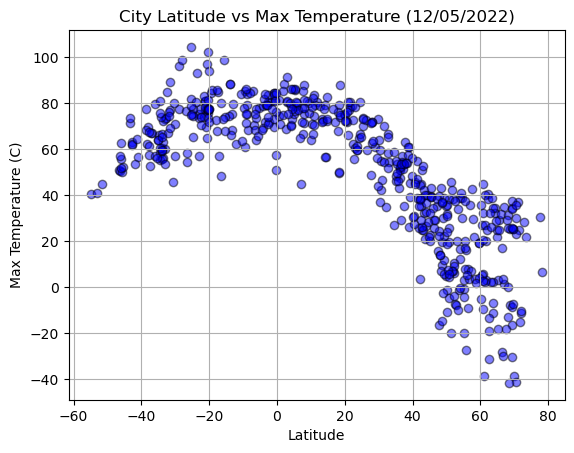

In [28]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Max Temp"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs Max Temperature ({today})")
plt.grid()
print("Temperature drops when we move away from the equator")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

No real trend observed between Latitude and Humidity


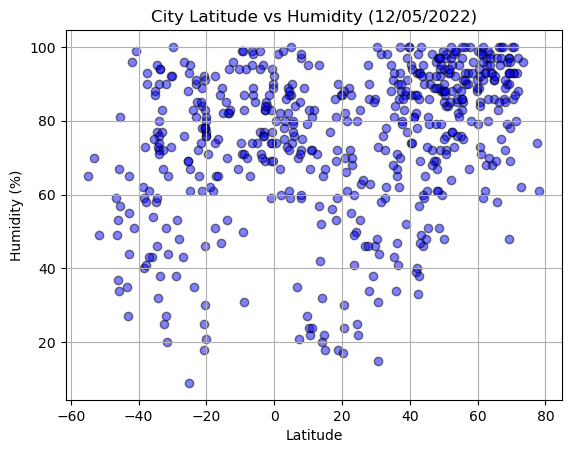

In [29]:
# Build the scatter plots for latitude vs. humidity
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Humidity"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({today})")
plt.grid()
print("No real trend observed between Latitude and Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

No real trend observed between Latitude and Cloudiness


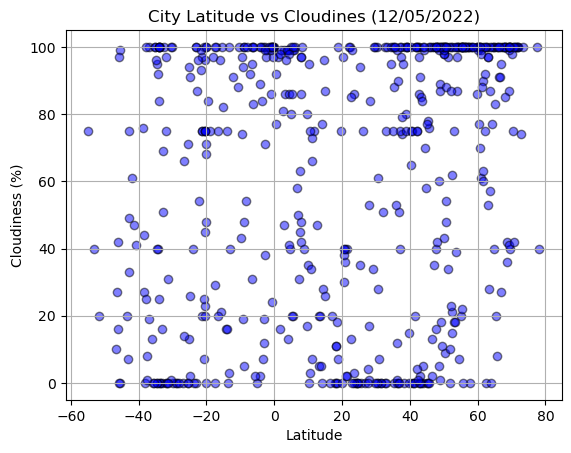

In [31]:
# Build the scatter plots for latitude vs. cloudiness
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Cloudiness"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudines ({today})")
plt.grid()
print("No real trend observed between Latitude and Cloudiness")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

No real trend observed between Latitude WindSpeed


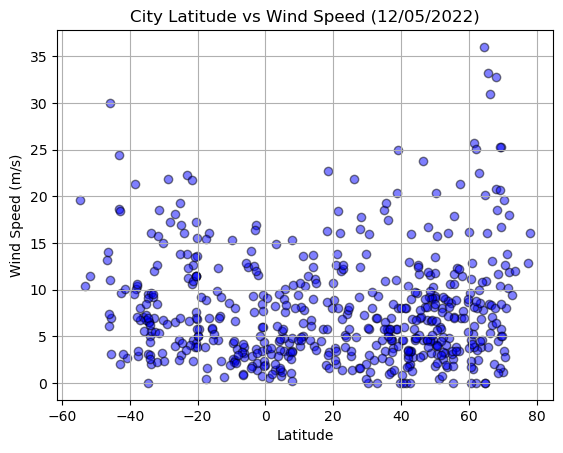

In [27]:
# Build the scatter plots for latitude vs. wind speed
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Wind Speed"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)



# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed ({today})")
plt.grid()
print("No real trend observed between Latitude WindSpeed")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
def linear_agression(x,y):
    print(f"The r-value is : {(st.pearsonr(x, y)[0])}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")


In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df =city_data_df.loc[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,aktash,50.3000,87.7333,-11.09,87,9,4.05,RU,1670296510
3,muli,2.9167,73.5667,80.51,75,99,8.25,MV,1670296512
5,constantine,36.3650,6.6147,47.61,71,0,2.30,DZ,1670296515
6,ponta do sol,32.6667,-17.1000,66.70,72,100,4.05,PT,1670296516
7,marzuq,14.4000,46.4667,56.55,65,28,3.96,YE,1670296517


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,50.81,59,10,13.20,NZ,1670296509
2,mar del plata,-38.0023,-57.5575,69.82,73,0,10.36,AR,1670296511
4,rawson,-43.3002,-65.1023,71.17,35,20,18.63,AR,1670296513
8,sao felix do xingu,-6.6447,-51.9950,70.59,99,100,0.96,BR,1670296518
9,bredasdorp,-34.5322,20.0403,55.15,77,95,3.13,ZA,1670296518


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.8360912910518123


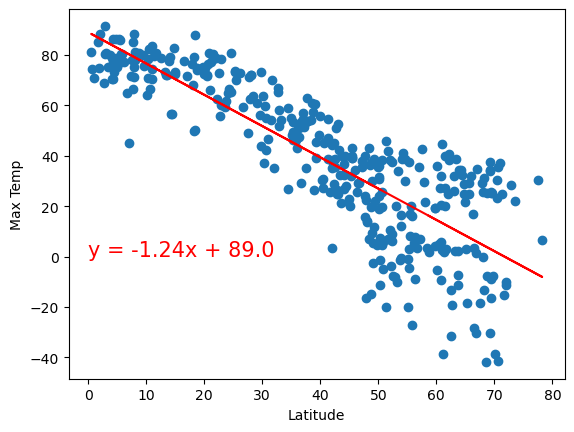

In [49]:
# Linear regression on Northern Hemisphere

equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

annotate(equation, 0, 0)


# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp")

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")


The r-value is : 0.48458800529822593


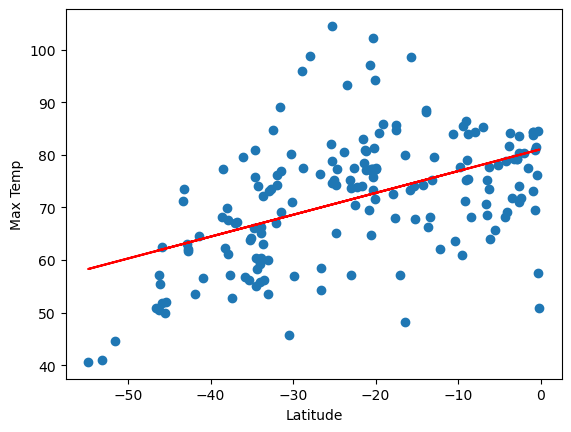

In [50]:
# Linear regression on Southern Hemisphere
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

annotate(equation, 0, 0)


# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp")

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")


**Discussion about the linear relationship:** There is a strong negative correlation between latitude and max temperature for northern hemisphere.However, there is positive correlation between latitude and max temperature for southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.3778426458968346


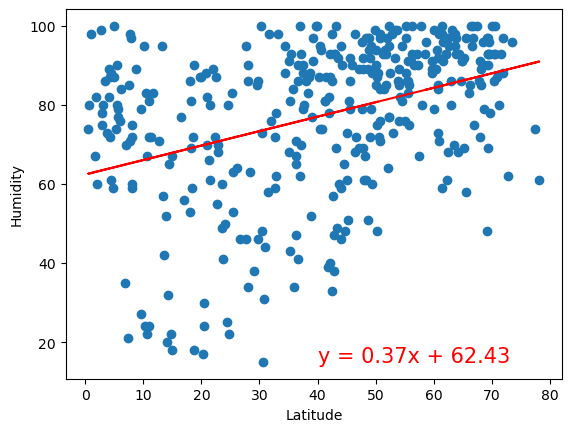

In [53]:
# Northern Hemisphere

equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

annotate(equation, 40, 15)

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")


The r-value is : 0.35894144010256074


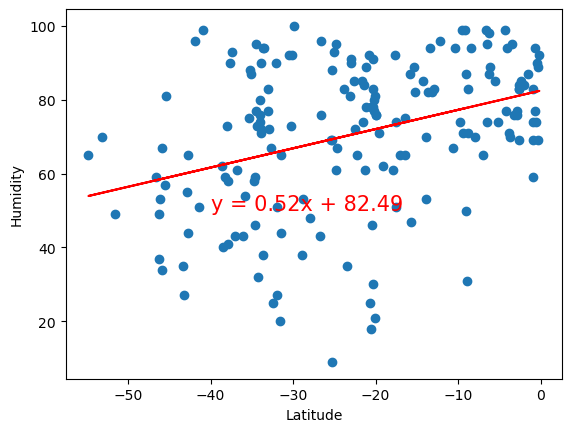

In [56]:
# Southern Hemisphere
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

annotate(equation, -40, 50)

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")

**Discussion about the linear relationship:** There is a positive correlation between latitude and humidity for northern and southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.26540339391569256


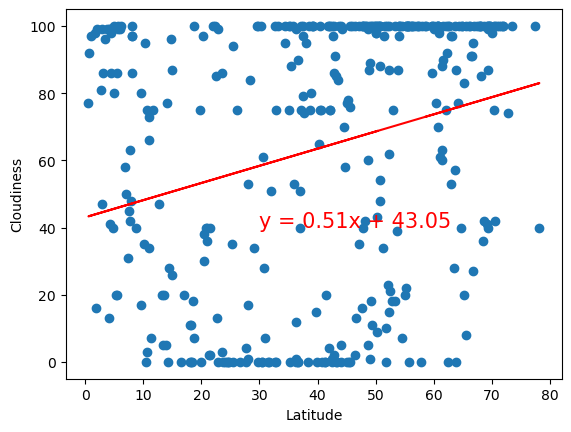

In [57]:
# Northern Hemisphere
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

annotate(equation, 30, 40)

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

The r-value is : 0.30702843577617234


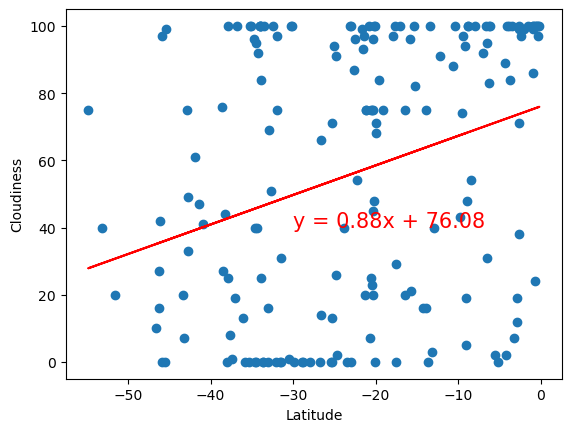

In [58]:
# Southern Hemisphere
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

annotate(equation, -30, 40)

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

**Discussion about the linear relationship:** There is positive correlation between latitude and cloudiness for southern and Northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.2130471100753591


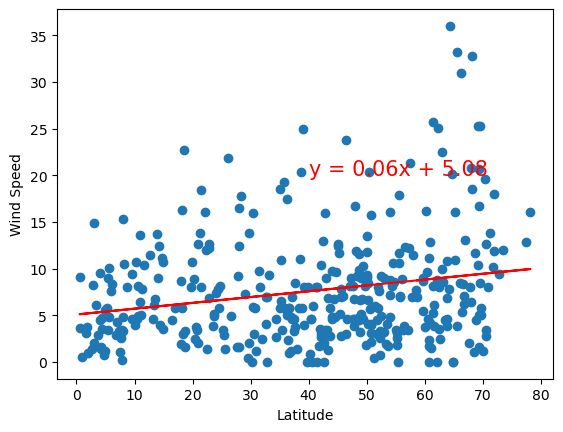

In [59]:
# Northern Hemisphere
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

annotate(equation,40,20)

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

The r-value is : -0.27537245056539916


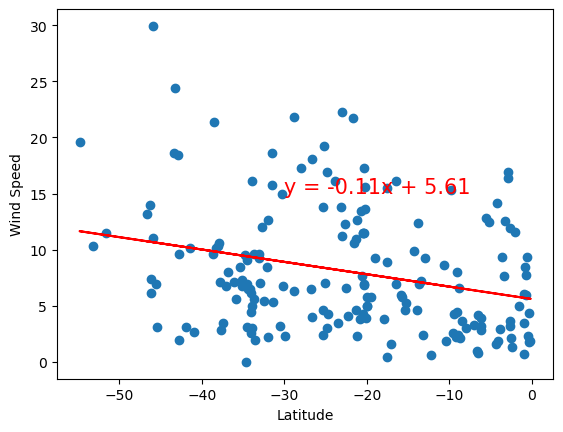

In [60]:
# Southern Hemisphere
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

annotate(equation, -30, 15)

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

**Discussion about the linear relationship:** There is a positive relationship between windspeed and latitude for northern hemisphere whereas negative correlation in southern hemisphere